# Lesson 1: Working with Data from TNC S3

**Objective:** Interact with geospatial dataset stored within AWS `S3` buckets, an industry standard cloud storage solution.

### Amazon Web Services

[Amazon Web Services, AWS](https://aws.amazon.com/) is an industry standard provider of cloud compute and storage services. AWS provides services for [storage (`S3`)](https://aws.amazon.com/pm/serv-s3), [data analysis (such as the `SageMaker`](https://aws.amazon.com/sagemaker/) instance being used here), and [traditional relational database deployments (`RDS`)](https://aws.amazon.com/rds/) amongst numerous other offerings.

At TNC, with regards to Geospatial use cases, AWS powers our Remote Desktop Nimbus (aka GeoCloud) environments and Lacus EO storage bucket, as examples.

### S3 Buckets Overview

S3 bucket contents are similar to a local file system structure with slightly different terminology. All files are referred to as `objects` in an S3 bucket. Objects can be grouped together using `prefixes` which act similarly to folders.

We can view the contents of an S3 bucket that we have permissions for in a few different ways including, python, the command line (CLI), or via a web UI console. **For this exercise, we'll be using the CLI utility.** Please see the `Additional Resources` section below for supplementary info on accessing S3 via all of these modes.

**Costs:** AWS S3 costs depend on a few different factors. Full pricing information can be found on [AWS' S3 Pricing page](https://aws.amazon.com/s3/pricing/). Currently (Feb 2026), TNC IT is covering costs of Sagemaker and S3 storage. In general though:
- There is a monthly charge for storing data in an S3 bucket (a few US cents per GB stored.
- There is a charge per HTTP call e.g `PUT`/`COPY`/`GET` (fractions of a cent per 1,000 calls).
- There is no charge for uploading data into an S3 bucket.
- There is a charge (centers per GB) if a user on the outside internet requests data from an S3 bucket.
  - In our Sagemaker configuration however, our S3 bucket exists within the same AWS region, and no "outbound" data transfer charges are incurred.

## Step 1: View Contents of an Existing S3 Bucket

When working with data in SageMaker on AWS, it's a standard practice to store working data within an S3 bucket.

For this workshop, we've got a pre-created S3 Bucket setup with TNC's `Countries Where We Work` dataset, which is [publicly available on ArcGIS Online](https://tnc.maps.arcgis.com/home/item.html?id=731eb31a47dc49deae39c00379525f5e).

- **S3 Bucket Name:** `ocs-training-2026`
- **Dataset Name:** `tnc_countries.geojson`

From this notebook, we'll use the aws cli (command line) utility to view the contents of the bucket.

### View Source Data Bucket Contents

Run the command in the following cell to list the bucket's contents. We'll be looking at a specific prefix (subdir) called `intermediate`.

**Note:** The `!` allows us to directly run the pre-installed `aws` command line utility, in the notebook cell, as opposed to a python code snippet.

In [1]:
!aws s3 ls --no-sign-request s3://ocs-training-2026/

                           PRE advanced/
                           PRE intermediate/


Above, we see output representing names of top-level prefixes (folders) in our bucket. Let's take a look at the `intermediate` prefix.

In [2]:
! aws s3 ls --no-sign-request --human-readable --recursive s3://ocs-training-2026/intermediate/

2026-01-28 14:43:44    0 Bytes intermediate/
2026-01-28 17:17:05   19.8 MiB intermediate/tnc_countries.geojson


We can see the bucket's `intermediate` prefix contains a geojson export of our dataset of interest `tnc_countries.geojson`. The `--human-readable` flag has converted the size into a more easy to understand `19.8 MiB` units. The `--recursive` flag lists child subprefixes (if they exist).

## Step 2: Uploading Data to S3

⚠️ **NOTE: Due to security restrictions write access to the training bucket is blocked. The following snippet can only be executed within TNC's Sagemaker environment.**

In addition to reading contents of our example S3 bucket, we can also write to it. To test this out, this repo has a copy of the publicly available TNC dataset [266 Pacific Atolls](https://geospatial.tnc.org/datasets/0632dbdfc4ee4f6bb752d2cdd001013e_0/explore?location=1.870750%2C0.195200%2C1) maintained by Mike Burnett. We'll upload it to S3.

Execute the following cell to perform the upload.

In [3]:
!aws s3 cp ../assets/266_pacific_atolls.geojson s3://ocs-training-2026/intermediate/266_pacific_atolls.geojson

upload: ../assets/266_pacific_atolls.geojson to s3://ocs-training-2026/intermediate/266_pacific_atolls.geojson


We can now check our work by inspecting the contents of `s3://ocs-training-2026/intermediate`

Execute the cell below to do that.

In [4]:
!aws s3 ls --no-sign-request --human-readable --recursive s3://ocs-training-2026/intermediate

2026-01-28 14:43:44    0 Bytes intermediate/
2026-01-28 22:42:35  211.4 KiB intermediate/266_pacific_atolls.geojson
2026-01-28 17:17:05   19.8 MiB intermediate/tnc_countries.geojson


## Step 3: Inspect Our Dataset

Let's use the Python [`geopandas` library](https://geopandas.org/en/stable/index.html) to visualize our dataset directly from S3 as a map.

ERROR 1: PROJ: proj_create_from_database: Open of /home/sagemaker-user/.conda/envs/ocs-intermediate/share/proj failed


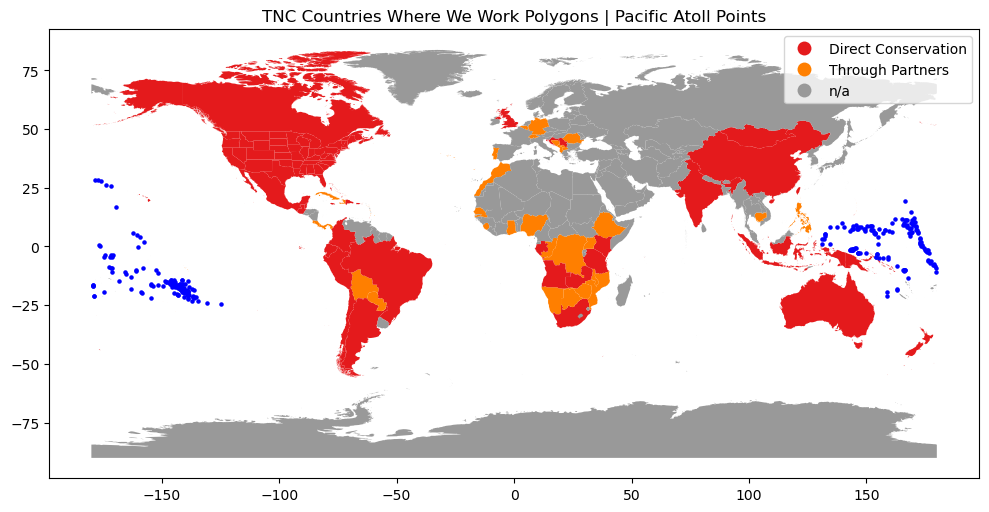

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
os.environ["AWS_NO_SIGN_REQUEST"] = "YES" # Required for SMSL

countries = gpd.read_file("s3://ocs-training-2026/intermediate/tnc_countries.geojson")
atolls = gpd.read_file("s3://ocs-training-2026/intermediate/266_pacific_atolls.geojson")

axes = countries.plot(column='Work_Type', cmap='Set1', legend=True, figsize=(12, 8))
atolls.plot(ax=axes, color="blue", markersize=5)

plt.title('TNC Countries Where We Work Polygons | Pacific Atoll Points')
plt.show()

## Conclusions

We've demonstrated the following concept in this workbook:
- In AWS S3 bucket terminology, `files` are referred to as `objects`. Objects can be grouped by `prefixes` similar to `folders`.
- AWS provides both command line and python packages for interacting with S3 buckets.
- Within the Sagemaker environment, we can interact with data remotely on S3. No need to pull it down to our local workstation (or even Sagemaker's local storage).

## Additional Resources

- [AWS Skill Builder](https://skillbuilder.aws/): This training portal provided by AWS contains self-paced training modules for all of AWS' cloud storage and compute services. While many of the courses are behind a paywall, many of the introductory courses are free to access. Use the web application's filtering function to focus your search, for example to [`Free` courses of the `Fundamental` skill level focused on `Data analytics`](https://skillbuilder.aws/category/domain/data-analytics?page=1&accessTier=free&courseLevel=fundamental)
- [AWS CLI S3 Commands Reference](https://docs.aws.amazon.com/cli/v1/userguide/cli-services-s3-commands.html): Nicely organized examples. For the older `1.X` version of the AWS CLI, but still applicable.
- [AWS CLI S3 Latest Docs](https://docs.aws.amazon.com/cli/latest/reference/s3/): The official manual for the AWS CLI S3 utility. See the list of [available commands](https://docs.aws.amazon.com/cli/latest/reference/s3/#available-commands) for further information.
- [Amazon S3 examples using SDK for Python (Boto3)](https://docs.aws.amazon.com/code-library/latest/ug/python_3_s3_code_examples.html): Numerous examples for using **Python** to interact with S3 buckets using the official `boto3` python package.